In [1]:
import pandas as pd

In [39]:
data = pd.read_csv('merged_curr_mcc.csv')
data = data.iloc[:, 2:]

/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
import re
def has_numbers(inputString):
    if bool(re.search(r'\d', inputString)):
        return False
    else:
        return True

In [45]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['weekday'] = data.transaction_date.apply(lambda x: x.weekday())
mask = data['mcc'].apply(has_numbers)
data = data[mask]
data

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon,currency_rate,weekday
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,Жилье,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177,0.991001,5
1,2.838200,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,Жилье,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177,0.991001,5
2,2.850720,NaN,NaN,NaN,NOVOSIBIRSK,RUS,643.0,0e4c72f1c28452fe3bab0283381b8afd,54.993,82.846,Пища,3 KARLA MARKSA SQNOVOSIBIRSK630048 RUSRUS,54.983245,82.891522,c88255ca0706d0ba02c6dfdeb10a0a9b,2017-07-15,NaN,NaN,0.991001,5
3,3.360791,NaN,NaN,NaN,MOSKVA,RUS,643.0,2197c215d2b24cc405b9ada9c258805c,55.812,37.641,Пища,"KRIVOKOLENNYY PER,10MOSKVA101000 RUSRUS",55.761528,37.636171,60642ad0e52d3a3b19687090b9468a4d,2017-07-15,NaN,NaN,0.991001,5
4,3.569982,NaN,NaN,NaN,MOSKVA,RUS,643.0,2197c215d2b24cc405b9ada9c258805c,55.812,37.641,Пища,"KRIVOKOLENNYY PER,10MOSKVA101000 RUSRUS",55.761528,37.636171,1b881909d9af94d48b368c42fd6cce4e,2017-07-15,NaN,NaN,0.991001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041844,3.335253,"Санкт-Петербург, бул. Новаторов, д. 11",59.850,30.267,ST-PETERSBURG,RUS,643.0,d29f7d1c13c125709420943decb8dffa,59.939,30.361,Деньги,NaN,NaN,NaN,f71fe06857a98c7248fa510962b0a138,2017-01-31,59.874,30.275,0.997263,1
1041845,3.311139,T\CHELYABINSK\454080 RUSRUS,NaN,NaN,CHELYABINSK,RUS,643.0,7db9c6f41786fd2e2b0473e9793b1082,55.162,61.380,Деньги,NaN,NaN,NaN,fad6012c4f124b2c17098156b06a8457,2017-01-31,55.191,61.362,0.997263,1
1041846,2.843263,"Санкт-Петербург, пр. Пискарёвский, д. 2, корп.2Щ",59.983,30.434,ST-PETERSBURG,RUS,643.0,eeb7bf69c619bb452bcb335ed855a1cf,60.042,30.361,Деньги,NaN,NaN,NaN,fd2bb60aecd9fcfc6e4f8bf946660528,2017-01-31,NaN,NaN,0.997263,1
1041847,4.264597,"YRSKIJ,D.4\S.-PETERBURG\190000 RUSRUS",NaN,NaN,S.-PETERBURG,RUS,643.0,e36f74c740a26962573e21af66c6f551,60.000,30.283,Деньги,NaN,NaN,NaN,ff052fc18d2fc476351815ce7c4c4226,2017-01-31,59.912,30.354,0.997263,1


In [46]:
geographical_t = [column for column in data.columns if column.endswith(('lon', 'lat', 'address'))]
not_geo_t = [column for column in data.columns if column not in geographical_t + ['transaction_date', 'terminal_id',
                                                                                     'country'
                                                                                     , 'currency', 'city', 
                                                                               'currency_rate']]
training_table = data[not_geo_t]

In [49]:
t_ = training_table.iloc[:, :3]
t_ = pd.get_dummies(t_, columns = ['mcc'])

In [53]:
mult_columns = [column for column in t_.columns if column not in ['amount', 'customer_id']]
t_ = t_[mult_columns].multiply(t_['amount'], axis = 'index')


In [55]:
t_['customer'] = training_table.customer_id

In [61]:
t_ = t_.groupby('customer').mean()

In [63]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [101]:
len(label)

9987

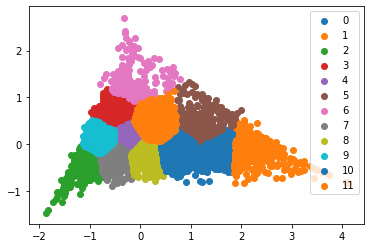

In [98]:
pca = PCA(2)
df = pca.fit_transform(t_)
kmeans = KMeans(init="random",
n_clusters=12,
n_init=10,
max_iter=300,
random_state=42)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [90]:
customers = training_table.customer_id.unique()
days = np.arange(0,7)
customers_clustering = pd.DataFrame(index = customers, columns = days)

In [97]:
customers_clustering[0]['0dc0137d280a2a82d2dc89282450ff1b'] = 1
customers_clustering

,0,1,2,3,4,5,6
0dc0137d280a2a82d2dc89282450ff1b,1,NaN,NaN,NaN,NaN,NaN,NaN
0e4c72f1c28452fe3bab0283381b8afd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197c215d2b24cc405b9ada9c258805c,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55cd57179082e927015e74115eda38a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5ad7f7eaedb1fd22692a2f95a5418548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
c40ff81e7e0cbf4d0cc26964afe86aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42eaf35c1e0bcd2ba2f3124cb6f6202a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e245f33d8ec289c63242a15e724d76f8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83cdf6e4bc280637064ed0f968aa5a3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
day_df = training_table[training_table['weekday'] == day]
customer_id = day_df.customer_id.values
print(len(customer_id))
day_df = pd.get_dummies(day_df, columns = ['mcc'])
day_df = day_df[mult_columns].multiply(day_df['amount'], axis = 'index')
day_df['customer'] = customer_id
customer_id = day_df['customer'].values
day_df = day_df.groupby('customer').mean()
day_df.index.values

142367


array(['0001f322716470bf9bfc1708f06f00fc',
       '0007297d86e14bd68bd87b1dbdefe302',
       '000b709c6c6fb1e8efcfd95e57c2a9de', ...,
       'ffaeae55d4dbf29058f04e7a6a764f02',
       'ffc5289194413ec68c3f7adc8121d69b',
       'ffdd5ec2a90e355cf40525eac1a6fd34'], dtype=object)

In [127]:
mult_columns = [column for column in t_.columns if column not in ['amount', 'customer_id']]
training_table.customer_id
columns = [i for i in range(0,7)]
for day in range(0,7):
    day_df = training_table[training_table['weekday'] == day]
    customer_id = day_df.customer_id.values
    print(len(customer_id))
    day_df = pd.get_dummies(day_df, columns = ['mcc'])
    
    day_df = day_df[mult_columns].multiply(day_df['amount'], axis = 'index')
    day_df['customer'] = customer_id
    
    print(len(customer_id))
    day_df = day_df.groupby('customer').mean()
    customer_id = day_df.index.values
    day_df = pca.fit_transform(day_df)
    label = kmeans.fit_predict(day_df)
    
    customers_clustering[day][customer_id] = label
    print('Done - {}, remain {}'.format(day + 1, 7 - day + 1))


142367
142367
Done - 12, remain -3
146991
146991
Done - 12, remain -3
149053
149053
Done - 12, remain -3
152992
152992
Done - 12, remain -3
173461
173461
Done - 12, remain -3
143519
143519
Done - 12, remain -3
124389
124389
Done - 12, remain -3


In [129]:
customers_clustering.to_csv('clustering.csv')